# Training loss and validation loss of the transformer model.
## After how many epochs does the model start overfitting?

In [1]:
from numpy import argmin, array, linspace, var
from scipy.interpolate import UnivariateSpline
from matplotlib.pyplot import xlim, ylim, xlabel, ylabel,\
   plot, legend, figure, vlines

def plot_metric(x, y_data, y_label):
    y = array(y_data)
    p = plot(x, y, '.', label=y_label)
    
    n = len(y) // 2
    spl = UnivariateSpline(x, y, s=n*var(y[n:]))

    z = linspace(x[0], x[-1], num=len(x)**2, endpoint=True)
    plot(z, spl(z), p[-1].get_color())


def present(df):
    display(df)
    figure(figsize=(12, 9))
    xlabel('Number of epochs')
    x = array(df['epoch'])
    ylim(0, 1)

    plot_metric(x, df['t_loss'], 'Training loss')
    plot_metric(x, df['v_loss'], 'Validation loss')
    plot_metric(x, df['t_accy'], 'Training accuracy')
    plot_metric(x, df['v_accy'], 'Validation accuracy')

    # Show the position of the minimum.
    i_min = df['v_loss'].idxmin()
    v_min = df['v_loss'].iloc[i_min]
    vlines(x[i_min], 0, v_min)
    legend()
    print(f'Validation loss reaches a minimum of {v_min} after {x[i_min]} epochs.')

,epoch,t_loss,t_accy,v_loss,v_accy
0,1,3.369533,0.115641,2.550037,0.222651
1,2,2.395761,0.215509,2.073402,0.298754
2,3,2.025183,0.283382,1.778846,0.356534
3,4,1.762050,0.332769,1.545522,0.407531
4,5,1.541337,0.371717,1.255637,0.462710
5,6,1.161977,0.441582,0.828666,0.560869
6,7,0.873683,0.501103,0.593973,0.618569
7,8,0.705239,0.537398,0.457926,0.650671
8,9,0.582434,0.565120,0.363809,0.674259
9,10,0.490594,0.586204,0.293091,0.692674


Validation loss reaches a minimum of 0.15077873197067196 after 24 epochs.


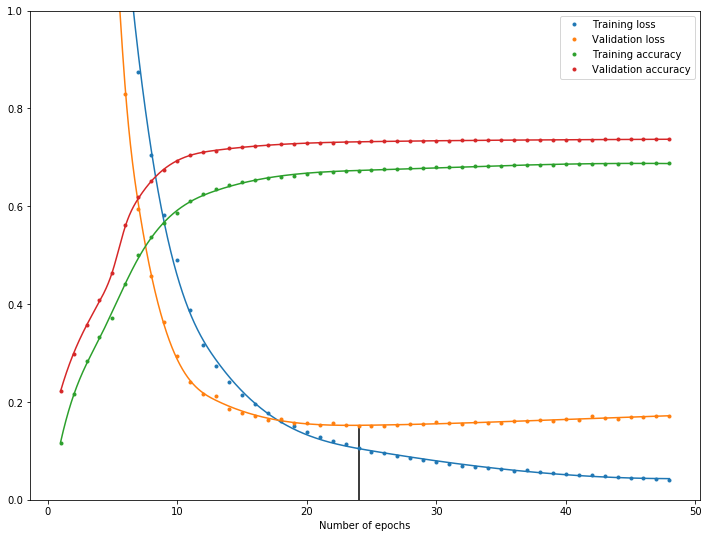

In [2]:
from pandas import read_csv

# d24695 is the data of a run of 48 epochs with test_size = 0.4 on Syriac.
d24695 = read_csv('job24695.csv', sep='\t')
present(d24695)

# Question: Why does the validation accuracy not decrease when the validation loss is increasing after epoch 24?

,epoch,t_loss,t_accy,v_loss,v_accy
0,1,3.237345,0.126506,2.454483,0.224076
1,2,2.288409,0.233041,1.961651,0.319241
2,3,1.893161,0.307826,1.637208,0.383408
3,4,1.591951,0.361985,1.311636,0.442751
4,5,1.162154,0.441711,0.785413,0.559989
...,...,...,...,...,...
91,92,0.019680,0.693284,0.177986,0.727164
92,93,0.019416,0.693373,0.181330,0.727563
93,94,0.020203,0.693210,0.183673,0.727227
94,95,0.019316,0.693382,0.179412,0.727473


Validation loss reaches a minimum of 0.13679495352592194 after 24 epochs.


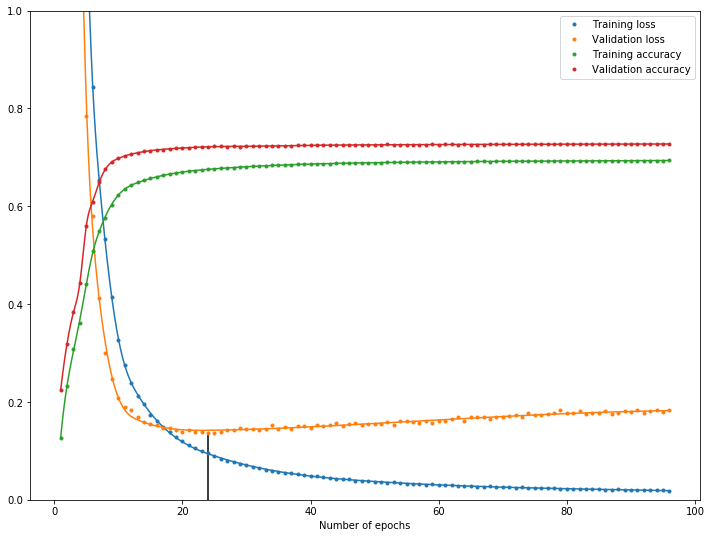

In [3]:
# d26114 is the data of a run of 96 epochs with test_size = 0.3 on Syriac
d26114 = read_csv('job26114.csv', sep='\t')
present(d26114)

,epoch,t_loss,t_accy,v_loss,v_accy
0,1,1.409527,0.402245,0.407825,0.643292
1,2,0.457430,0.593293,0.180434,0.699421
2,3,0.234236,0.644597,0.113192,0.715818
3,4,0.149642,0.663978,0.083263,0.722958
4,5,0.111322,0.672657,0.067431,0.726907
5,6,0.089111,0.677574,0.057679,0.729298
6,7,0.074593,0.680754,0.051469,0.730864
7,8,0.064484,0.683010,0.047067,0.732031
8,9,0.056780,0.684714,0.042956,0.732878
9,10,0.050873,0.686003,0.041621,0.733586


Validation loss reaches a minimum of 0.03249202546856052 after 26 epochs.


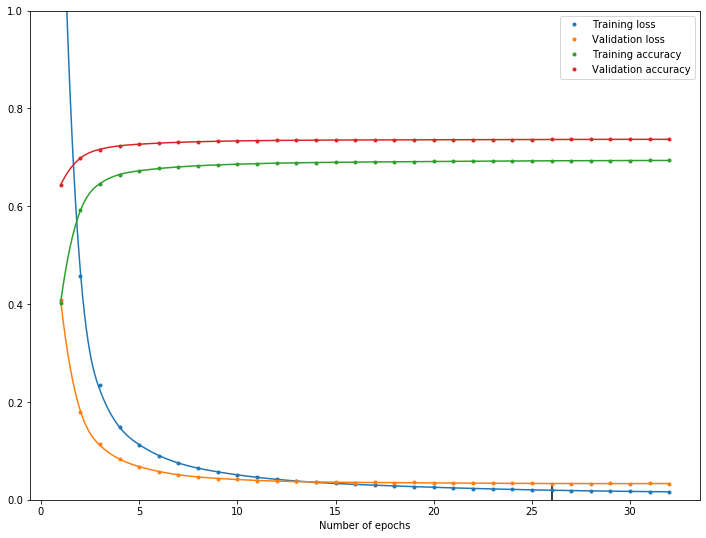

In [4]:
# d26514 is the data of a run of 32 epochs with test_size = 0.3 on Hebrew
d26514 = read_csv('job26514.csv', sep='\t')
present(d26514)

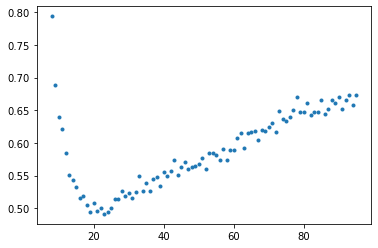

In [5]:
df = d26114[8:]
plot(df['v_loss']/(1-df['v_accy']), '.')